In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

Data read from excel file

In [4]:
df=pd.read_csv('data.csv')
df

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


Text(0.5, 1.0, 'price vs weight')

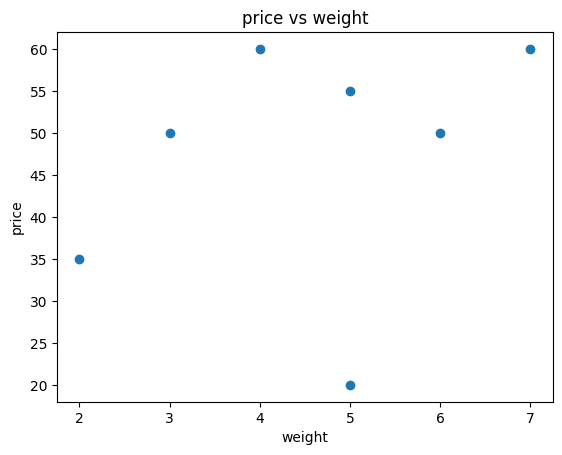

In [15]:
plt.scatter(df['weight'],df['price'])
plt.xlabel('weight')
plt.ylabel('price')
plt.title('price vs weight')

Row code <br>
Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)<br>
 Intercept, c = ȳ - m * x

In [32]:
x=df['weight']
y=df['price']
x_mean=np.mean(x)
y_mean=np.mean(y)
dev_x=x-x_mean
dev_y=y-y_mean
coffecient=np.sum(dev_x*dev_y)/np.sum(dev_x**2)
intercept=y_mean-coffecient*x_mean
print("coffecient=",coffecient)
print("intercept=",intercept)
coffecient*6+intercept

coffecient= 2.620967741935484
intercept= 35.16129032258065


50.88709677419355

Compute the residuals for each data point

In [41]:
prediction1=coffecient*x+intercept
residual1=y-prediction1
residual1

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
dtype: float64

Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE)

In [52]:
mae=(np.sum(abs(y-prediction1)))/len(df)
mse=(np.sum((y-prediction1)**2))/len(df)
print("mean_squared_error is",mse)
print('mean_absolute_error is',mae)

mean_squared_error is 167.30990783410135
mean_absolute_error is 9.87327188940092


Using Sklearn

In [34]:
from sklearn.linear_model import LinearRegression  
reg=LinearRegression()
reg.fit(df[['weight']],df['price'])
print("coffecient=",reg.coef_)
print("intercept=",reg.intercept_)

coffecient= [2.62096774]
intercept= 35.16129032258065


In [35]:
reg.predict([[6]])

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50.88709677])

Compute the residuals for each data point

In [8]:
prediction=reg.predict(df[['weight']])
residual=df['price']-prediction
residual

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
Name: price, dtype: float64

Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE)

In [11]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("mean_squared_error is",mean_squared_error(df['price'],prediction))
print('mean_absolute_error is',mean_absolute_error(df['price'],prediction))

mean_squared_error is 167.30990783410135
mean_absolute_error is 9.87327188940092


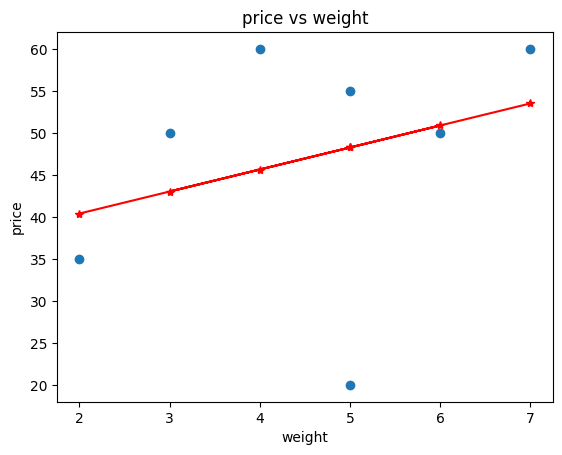

In [17]:
plt.scatter(df['weight'],df['price'])
plt.xlabel('weight')
plt.ylabel('price')
plt.title('price vs weight')
plt.plot(df[['weight']],prediction,color='red',marker='*')

In [54]:
df['prd_price']=prediction
df['residuals']=residual
df

,weight,price,prd_price,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935
